Quick-access to datasets: https://drive.google.com/file/d/1cTz1ZbUpa5zNj6jqYhCSkdE4A0-umYCq/view?usp=sharing 

tweet_dataset.csv contains tweets with sentiments determined
vaccination_all_tweets.csv contains vaccination related tweets

Both are from Kaggle.com

# Importing the packages

In [ ]:
import sys
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.multiclass import OneVsRestClassifier
# For data preprocessing
import html
import re
from sklearn.svm import SVC
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Loading both datasets, one containing sentiments (df1), one containing vaccination tweets(df2).
df1 = pd.read_csv("tweet_dataset.csv")
df2 = pd.read_csv("vaccination_all_tweets.csv")

In [ ]:
# Displaying contents of the first five rows of dataset1.
df1.head()

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier a...,@tiffanylue i know i was listenin to bad habi...,p1000000000,NaN,NaN
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Houston...,@dannycastillo We want to trade with someone w...,82565a56d3,neutral,We want to trade with someone who has Houston ...


In [ ]:
# Displaying contents of the first five rows of dataset2.
df2.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
# Renaming columns to combine into one df.
df1=df1.rename(columns={'old_text':'Text'})
df2=df2.rename(columns={'text':'Text'})

In [ ]:
one=df1[['Text']]
two=df2[['Text']]

In [ ]:
# Merging both of them in single dataframe to be processed.
df=pd.concat([one,two],axis=0)
df=df.reset_index(drop=True)

In [ ]:
df = df.sample(30000,random_state=1000)

# Data Preprocessing Steps

# 1. Data Cleaning:
By identifying and correcting errors in the dataset that may negatively impact the performance of the prediction model, the algorithms can gain better results.

# 2. Removing Contractions:
Now we must perform expand contraction on the dataset. This is important because in a typical social media post, some people would usually text using shortened words or using abbreviations. Therefore, removing contractions from the text improves text standardization.

# 3. Tokenization, Stemming and Lemmatization:
Tokenization helps in breaking down the text into smaller units. Stemming finds the base form of the words, and lemmatization finds the form of related words. In this way we would be able to standardize our text, which would help us in implementing machine learning models with greater accuracy.

# 4. Removing Brackets, Punctuations, Numbers, and etc:
Next step is to remove links, brackets, punctuations, numbers, and other unneeded components, from the text. This is displayed once we implement the clean() function, which helps in removing noise, and unimportant parts of the text for data analysis.

# 5. Removing Stop Words:
In most languages, stop words are the most common words such as; are, is, a, on, the, to, at, and many more. However, these words wouldn’t add much value when analyzing text data or building a natural language processing (NLP) model. Therefore, we will be removing them from the text.

# 6. Tokenization of the Text:
Tokenization is the process of making smaller units out of the sentence in the text. These smaller units are called tokens in natural language processing (NLP).

# 7. Cleaning Using Regular Expressions:
The tweets or other social media posts written by people usually contains wrong spellings, emojis, special symbols, and other noise. Therefore, we would be using regular expressions for the purpose of cleaning of the dataset and keeping it unconvoluted.

In [ ]:
# Removing extra spaces
def remove_spaces(text):
    text=text.strip()
    text=text.split()
    return ' '.join(text)

In [ ]:
# Removing contractions
contraction = {'cause':'because',
              'aint': 'am not',
              'aren\'t': 'are not'}

def mapping_replacer(x,dic):
    for words in dic.keys():
        if ' ' + words + ' ' in x:
            x=x.replace(' '+ words +' ' ,' '+dic[words]+' ' )
    return x

In [ ]:
# Stemming 
nltk.LancasterStemmer
ls = LancasterStemmer()
lem = WordNetLemmatizer()
def lexicon_normalization(text):
    words = word_tokenize(text) 
    
    
    # 1- Stemming first
    words_stem = [ls.stem(w) for w in words]
    
    # 2- Then appliying lemmatization
    words_lem = [lem.lemmatize(w) for w in words_stem]
    return words_lem

In [ ]:
# Dedicated function for text cleaning
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    # Removes twitter handles
    text = re.sub('@[^\s]+','',text)
     # Removes emojis
    text = text.encode('ascii', 'ignore').decode('ascii')
    # Removes hashtags
    text = re.sub(r'\B#\S+','',text)
    # Removes URLs
    text = re.sub(r"http\S+", "", text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\'','', text)
    
    return text

In [ ]:
# Removes stop words
def remove_stopword(text):
    stop_words = stopwords.words('english')
    stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stopwords_dict])
    return text

In [ ]:
# Tokenizes the text
def tokenise(text):
    words = word_tokenize(text) 
    return words

Applying all the functions that we defined above on the *dataframe*

In [ ]:
df['Text']=df['Text'].apply(lambda x:clean_text(x))

In [ ]:
df['Text'] = df['Text'].map(lambda x: re.sub(r'\W+', ' ', str(x)))
df['Text'] = df['Text'].replace(r'\W+', ' ', regex=True)

In [ ]:
df['Text']=df['Text'].apply(lambda x: mapping_replacer(x, contraction))

In [ ]:
df['Text']=df['Text'].apply(lambda x: remove_stopword(x))

In [ ]:
df['Text']=df['Text'].apply(lambda x: lexicon_normalization(x))

#### Plotting the most common words

In [ ]:
top = Counter([item for sublist in df['Text'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,vaccin,7986
1,do,4791
2,slot,4068
3,ag,2734
4,u,1973
5,get,1910
6,covid,1853
7,dat,1723
8,got,1695
9,hospit,1517


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=900, height=700,color='Common_words')
fig.show()

In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words', height = 700)
fig.show()

In [ ]:
# Function to plot the wordcloud
def choose_category_content(df,category):
    articles_series = df[df['sentiment'] == category]['Text']
    words = ' '.join(articles_series)
    return words

def wordcloud_gen(df,category):  
    wordcloud = WordCloud(
        width = 1600,
        height = 1000,
        min_font_size = 10).generate(choose_category_content(df,category))

    plt.figure(figsize = (16, 10), facecolor = None) 
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# Sentiment Analysis using TextBlob

In [ ]:
# Extract sentiments using the text blob
def get_tweet_sentiment(tweet): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # Create TextBlob of passed tweets 
    analysis = TextBlob(tweet) 
    
    # Setting sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [ ]:
textblob_df=df.copy()

In [ ]:
textblob_df['sentiment']=df['Text'].apply(lambda x: get_tweet_sentiment(' '.join(x)))

In [ ]:
textblob_df.head()

,Text,sentiment
235636,"[ind, hit, cror, vaccin, on, day, tim]",neutral
77686,[],neutral
205338,[ful],neutral
243575,"[mad, ind, vaccin, avail, kid, covaxin, get, a...",negative
240917,"[avail, slot, slot]",neutral


In [ ]:
l=[]
for i in textblob_df['Text']:
    str1 = " " 
    t=str1.join(i)
    l.append(t)
textblob_df['Text']=l   

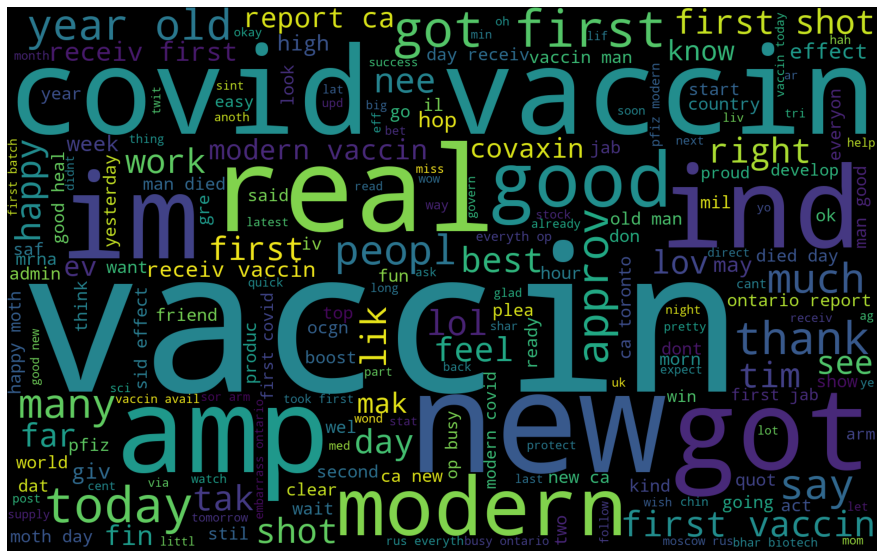

In [ ]:
# Word cloud for positive sentiments
wordcloud_gen(textblob_df,"positive")

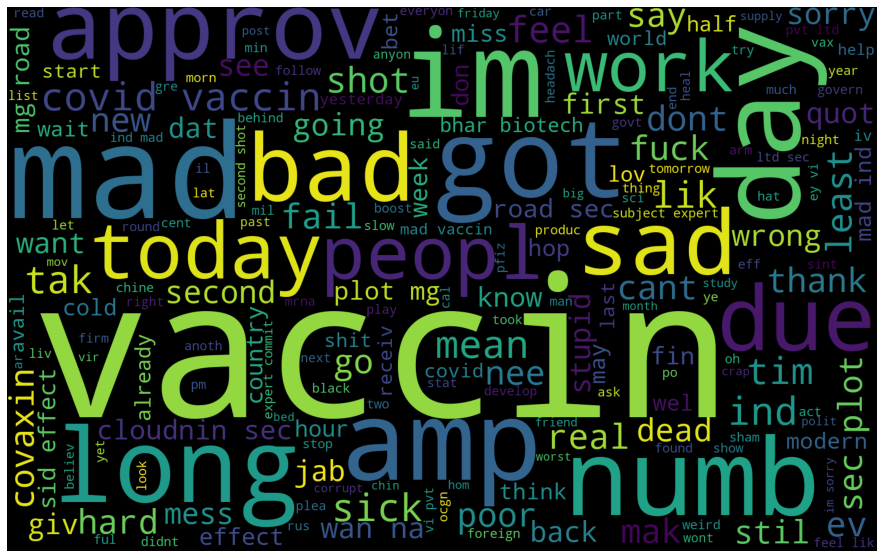

In [ ]:
# Word cloud for negative sentiments
wordcloud_gen(textblob_df,"negative")

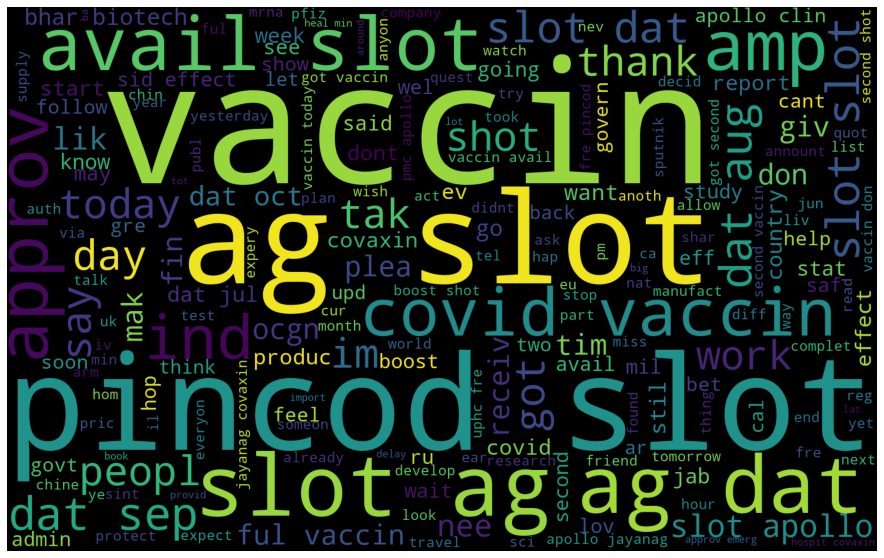

In [ ]:
# Word cloud for neutral sentiments
wordcloud_gen(textblob_df,"neutral")

# Using the Bag of Words technique (a previously learned datamining skill).
Since the text is still noisy, and modelling it with a Machine learning algorithm requires a well defined input and output, we will need to apply bag-of-words method to get certain features from the tweets. For this instance, we are limiting the features to a maximum of 2500 and then converting the dataframe of the array into vectors and finally concatenating the features.

In [ ]:
# Converting Tweets' features into a vector using Bag-of-words
vectorizer = CountVectorizer(max_features=2500)
X = vectorizer.fit_transform(textblob_df['Text'])
b=vectorizer.get_feature_names()

In [ ]:
# Creating a dataframe of the array which was converted into a vector, then concatenating it with other features
df_final = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()) 

In [ ]:
# The new dataframe with the concatenated features
X=df_final.copy()
y=textblob_df['sentiment']

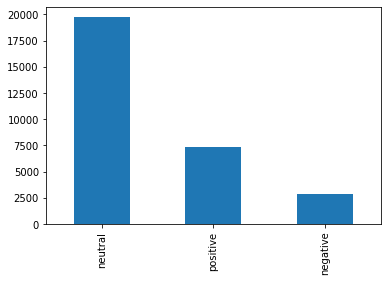

In [ ]:
y.value_counts().plot.bar()

In [ ]:
# Splitting data gathered by TextBlob into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

# Machine Learning Models vs. TextBlob

### Naive Bayes

In [ ]:
# Training the NBC model
dt = MultinomialNB()
dt.fit(X_train, y_train)

# Getting predictions
y_predict_dt = dt.predict(X_test)

accuracy 0.8796969696969696
precision 0.8074874192767522
recall 0.8640735007549757


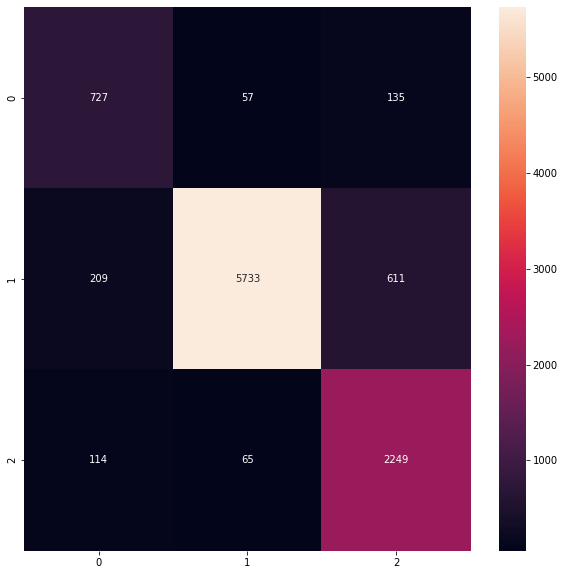

In [ ]:
# Evaluating the NBC model
print('accuracy',accuracy_score((y_test), y_predict_dt))
print('precision',precision_score(y_test, y_predict_dt, average='macro'))
print('recall',recall_score(y_test, y_predict_dt, average='macro'))

# Confusion matrix to summarize the performance of the NBC algorithm
cm = confusion_matrix(y_test, y_predict_dt)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")

# SVM

In [ ]:
# Training the SVM model
!python -m pip install --upgrade pip
!python -m pip install scikit-learn-intelex
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)


# Getting the predictions
y_predict_svm = svm.predict(X_test)

     |████████████████████████████████| 2.1 MB 20.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.3/284.3 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 70.2 MB/s eta 0:00:00


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


accuracy 0.9444444444444444
precision 0.9514195887814063
recall 0.8535807133463997


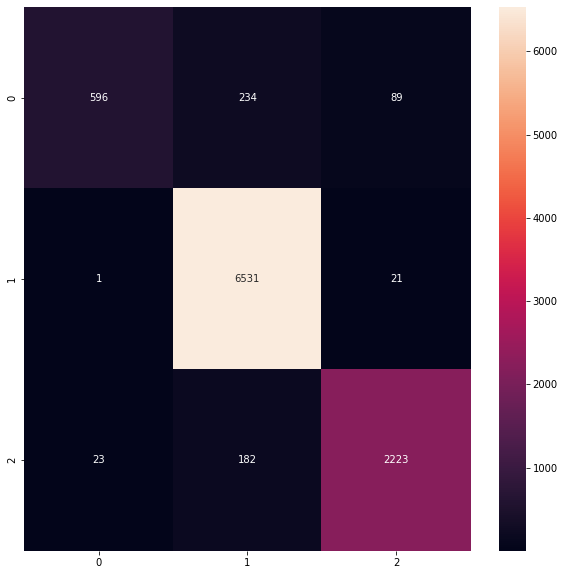

In [ ]:
# Evaluating the SVM model
print('accuracy',accuracy_score((y_test), y_predict_svm))
print('precision',precision_score(y_test, y_predict_svm, average='macro'))
print('recall',recall_score(y_test, y_predict_svm, average='macro'))

# Confusion matrix to summarize the performance of the SVM algorithm
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_predict_svm)
sns.heatmap(cm, annot=True, fmt="d")

### Random Forest Model

In [ ]:
# Training the RF model
rf =RandomForestClassifier(random_state=10000) 
rf.fit(X_train, y_train)

# Getting the predictions 
y_predict_rf = rf.predict(X_test)

accuracy 0.9768686868686869
precision 0.9672901219511388
recall 0.9400112210600536


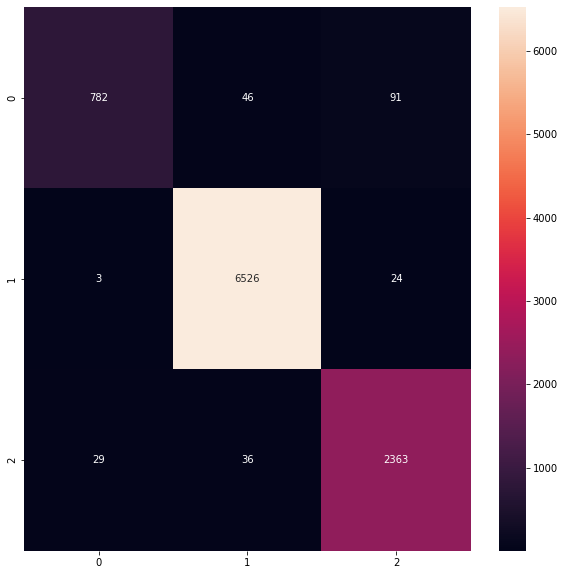

In [ ]:
# Evaluating the RF model
print('accuracy',accuracy_score((y_test), y_predict_rf))
print('precision',precision_score(y_test, y_predict_rf, average='macro'))
print('recall',recall_score(y_test, y_predict_rf, average='macro'))

# Confusion matrix to summarize the performance of the RF algorithm
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_predict_rf)
sns.heatmap(cm, annot=True, fmt="d")

# Sentiment Analysis using VADER

In [ ]:
# Function to print sentiments of the sentence.
def sentiment_scores(sentence):
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    # This sid_obj gives a sentiment dictionary, while the polarity_scores is a method of SentimentIntensityAnalyzer which contains pos, neg, neu, and compound sentiment scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    # Decide the sentence's sentiment as positive, negative or neutral based on the compond scores.
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        return "Negative"
    else :
        return "Neutral"

In [ ]:
vader_df=df.copy()

In [ ]:
vader_df['sentiment']=df['Text'].apply(lambda x: sentiment_scores(' '.join(x)))

In [ ]:
vader_df.head()

,Text,sentiment
235636,"[ind, hit, cror, vaccin, on, day, tim]",Neutral
77686,[],Neutral
205338,[ful],Neutral
243575,"[mad, ind, vaccin, avail, kid, covaxin, get, a...",Negative
240917,"[avail, slot, slot]",Neutral


In [ ]:
new_vader_df=vader_df.copy()
l=[]
for i in new_vader_df['Text']:
    str1 = " " 
    t=str1.join(i)
    l.append(t)
new_vader_df['Text']=l

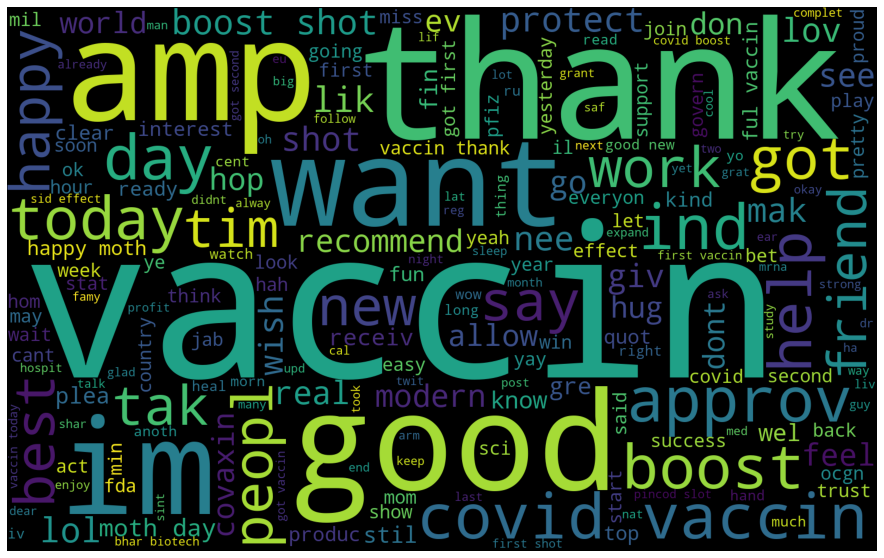

In [ ]:
# Word cloud for words with a positive sentiment
wordcloud_gen(new_vader_df,"Positive")

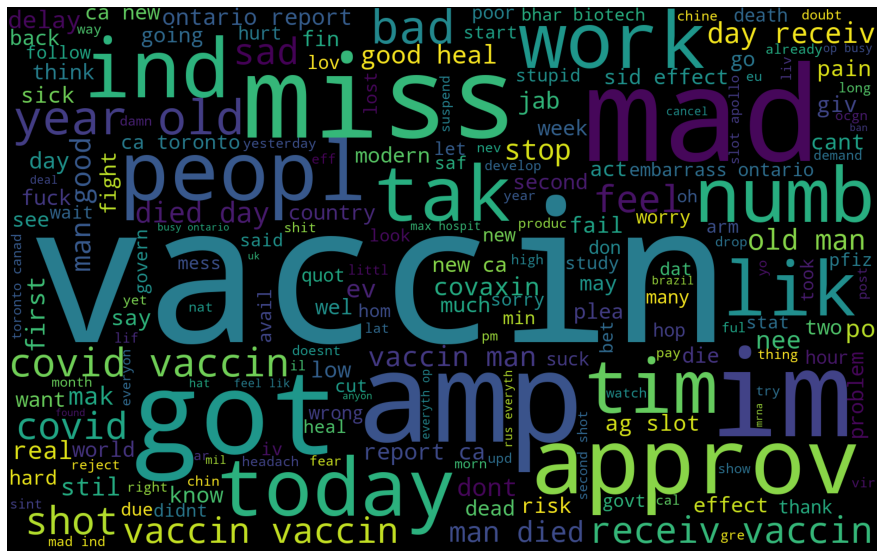

In [ ]:
# Word cloud for words with a negative sentiment
wordcloud_gen(new_vader_df,"Negative")

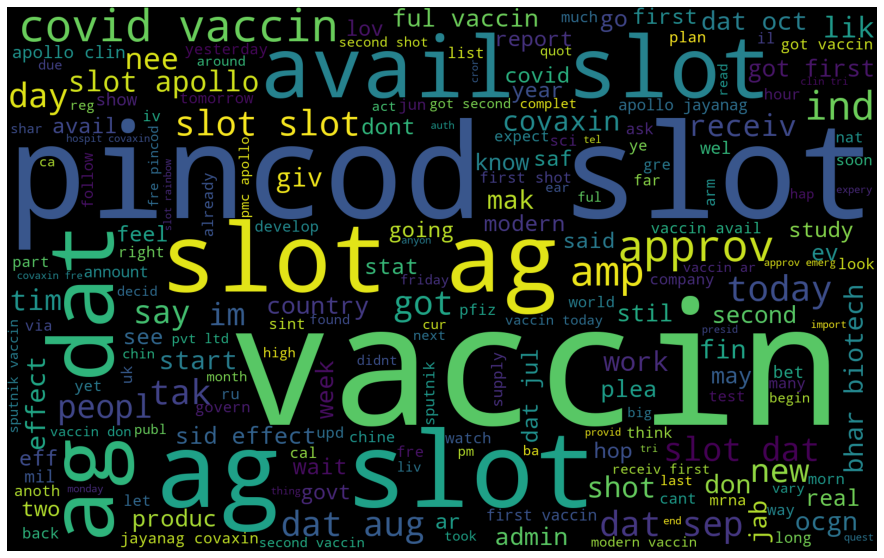

In [ ]:
# Word cloud for words with a neutral sentiment
wordcloud_gen(new_vader_df,"Neutral")

In [ ]:
# Plotting the sentiments classified by VADER
X2=df_final.copy()
y2=vader_df['sentiment']

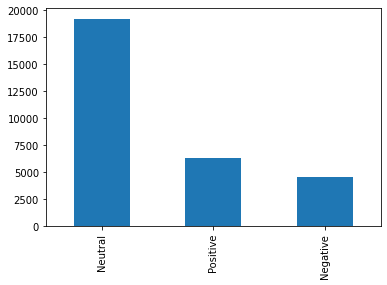

In [ ]:
y2.value_counts().plot.bar()

In [ ]:
# Splitting data gathered by VADER into training and testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.33, random_state=42)

# Machine Learning Models vs. VADER

### Naive Bayes

In [1]:
# Training the NBC model
nb = MultinomialNB()
nb.fit(X_train2, y_train2)

# Getting predictions
y_predict_nb = nb.predict(X_test2)

NameError: ignored

In [ ]:
# Evaluating the NBC model
print('accuracy',accuracy_score((y_test2), y_predict_nb))
print('precision',precision_score(y_test2, y_predict_nb, average='macro'))
print('recall',recall_score(y_test2, y_predict_nb, average='macro'))

# Confusion matrix to summarize the performance of the NBC algorithm
cm = confusion_matrix(y_test2, y_predict_nb)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")

### SVM

In [ ]:
# Training the SVM model
svm2 = SVC() 
svm2.fit(X_train2, y_train2)

# Getting the predicted values
y_predict_svm2 = svm2.predict(X_test2)

In [ ]:
# Evaluating the SVM model
print('accuracy',accuracy_score((y_test2), y_predict_svm2))
print('precision',precision_score(y_test2, y_predict_svm2, average='macro'))
print('recall',recall_score(y_test2, y_predict_svm2, average='macro'))

# Confusion matrix to summarize the performance of the SVM algorithm
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test2, y_predict_svm2)
sns.heatmap(cm, annot=True, fmt="d")

### Random Forest

In [ ]:
# Training the RF model
rf2 =RandomForestClassifier(random_state=10000) 
rf2.fit(X_train2, y_train2)

# Getting the predicted values
y_predict_rf2 = rf2.predict(X_test2)

In [ ]:
# Evaluating the RF model
print('accuracy',accuracy_score((y_test2), y_predict_rf2))
print('precision',precision_score(y_test2, y_predict_rf2, average='macro'))
print('recall',recall_score(y_test2, y_predict_rf2, average='macro'))

# Confusion matrix to summarize the performance of the RF algorithm
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test2, y_predict_rf2)
sns.heatmap(cm, annot=True, fmt="d")

# Results of Machine Learning Models vs. TextBlob:

|----------|Naive Bayes Classifier | Support Vector Machine | Random Forest Classifier |
|----------|-------------------|--------------------|-------------------|
| Accuracy | 0.8796969696969696 | 0.9444444444444444 | 0.9768686868686869 |
| Precision | 0.8074874192767522 | 0.9514195887814063 | 0.9672901219511388 |
| Recall | 0.8640735007549757 | 0.8535807133463997 | 0.9400112210600536 |


# Results of Machine Learning Models vs. VADER:

|----------|Naive Bayes Classifier | Support Vector Machine | Random Forest Classifier |
|----------|-------------------|--------------------|-------------------|
| Accuracy | 0.8371717171717171 | 0.9066666666666666 | 0.9503030303030303 |
| Precision | 0.7753300364855281 | 0.9192409582915507 | 0.9352832988084039 |
| Recall | 0.8145668837425682 | 0.8233041071519365 | 0.9116834056582782 |

# Accuracy of models

The *accuracy* of these Machine Learning Models are determined by the formula $\frac{TP + TN}{TP + TN + FP + FN}$ which expresses the number of instances in which correct predictions are made, over the overall number of identification.

---
Based off the *accuracy* values produced when comparing the ML models to the TextBlob method, we can see that our initial hypothesis, that the support vector machine would have the highest accuracy, is confirmed. However, since adding the Random Forests Classifier, the SVM has since been dethroned to second place. This may be because of the multiclass nature of the RF classifier, allowing multiple categories of the dataset to be used as is. On the other hand, the SVM is more dual-class oriented. The SVM also relies on the distance between two datapoints to maximize its margins, which are determined by the programmer, a source for human error. The Naive Bayes may have performed poorly compared to the other models, however its value of 0.837 is higher than initially predicted. The NBC may have lacked accuracy due to its assumption of features being independent, leading to some false identifications based off correlation between the datapoints.

# Precision of models
The *precision* of these Machine Learning Models are determined by the formula $\frac{TP}{TP + FP}$, which expresses the number of RELEVANT predictions, over the number of false positives and true positives.

---
Based off the *precision* values produced when comparing the ML models to the TextBlob method, we can see that our initial hypothesis, that the support vector machine would have the highest accuracy, was supported. However, since adding the Random Forests Classifier, the SVM has also been dethroned to second place from the tables shown for VADER and TextBlob. The Naive Bayes performed the poorest out of all the models, showing that the NBC had a percision of 0.807 and 0.775 in predicting the labels of TextBlob and Vader respectively. These values determines how many of the predicted labels were actually relevant to the sentiment.

# Recall of models
The *recall* of these Machine Learning Models are determined by the formula $\frac{TP}{TP + FN}$, which expresses the number of CORRECT AND RELEVANT predictions, over the number of false negatives and true positives.

---
Based off the *recall* values produced when comparing the ML models to the TextBlob method, we can see that our resulting model rankings are slightly different for each NLP method. While the ML model comaprison to VADER resulted in similar rankings, when compared to the TextBlob method, the rankings were shifted with Naive Bayes being the 2nd, while the Support Vector Machine remained on 1st place. An explanation to why the Naive Bayes performed far better on this instance maybe due to overfitting within the Random Forests Classifier.

# Conclusions
Within this machine learning project, we have displayed data extraction from a csv, sentiment extraction through the usage of the VADER and TextBlob Natural Language Processing tools, and the implementation of three machine learning models (Naive Bayes, Support Vector Machine, and Random Forest). Through this project we have determined that our initial hypothesis, that the support vector machine would produce a higher overall accuracy of predicting the labelled sentiments’ true value when compared to a Naive Bayes classifier, is true. Although adding the Random Forest classifier has proven the hypothesis false, this was done in hindsight, and the initial hypothesis would still hold true without the addition of this model. Additional metrics of accuracy such as perceision and recall were also added to the preliminary results, to allow minimization of false positives and negatives. Some features such as emoji, and hashtag sentiment classification were removed from the preliminary results, as they provided too much noise to the data.